In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

sns.set_style('ticks')

#Reading data
data = pd.read_csv('income-rent-bad.csv')
type(data)

pandas.core.frame.DataFrame

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data

,Income,Rent
0,2300,950
1,1400,500
2,2400,1000
3,5250,1800
4,4375,1600
5,1800,600
6,1500,500
7,1600,600
8,4150,1800
9,4500,1750


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,10.0,2927.5,1473.207480,1400.0,1650.0,2350.0,4318.75,5250.0
Rent,10.0,1110.0,568.037557,500.0,600.0,975.0,1712.50,1800.0


In [5]:
x=data['Income'].values
y=data['Rent'].values

In [6]:
x

array([2300, 1400, 2400, 5250, 4375, 1800, 1500, 1600, 4150, 4500],
      dtype=int64)

In [7]:
y

array([ 950,  500, 1000, 1800, 1600,  600,  500,  600, 1800, 1750],
      dtype=int64)

In [8]:
#Creating the Regression Model

In [9]:
# Create a model of Linear Regression
model = linear_model.LinearRegression()

# Fitting the model
model.fit(data[['Income']],data[['Rent']])

print("Coefficient (slope - m)",model.coef_)
print("Intercept in Model (c)",model.intercept_)

Coefficient (slope - m) [[0.37755216]]
Intercept in Model (c) [4.71604235]


In [10]:
predictions = model.predict(data[['Income']])

In [11]:
predictions

array([[ 873.08601762],
       [ 533.28907077],
       [ 910.84123393],
       [1986.86489894],
       [1656.50675617],
       [ 684.30993604],
       [ 571.04428709],
       [ 608.79950341],
       [1571.55751946],
       [1703.70077657]])

In [13]:
data['Predictions']= predictions
data

,Income,Rent,Predictions
0,2300,950,873.086018
1,1400,500,533.289071
2,2400,1000,910.841234
3,5250,1800,1986.864899
4,4375,1600,1656.506756
5,1800,600,684.309936
6,1500,500,571.044287
7,1600,600,608.799503
8,4150,1800,1571.557519
9,4500,1750,1703.700777


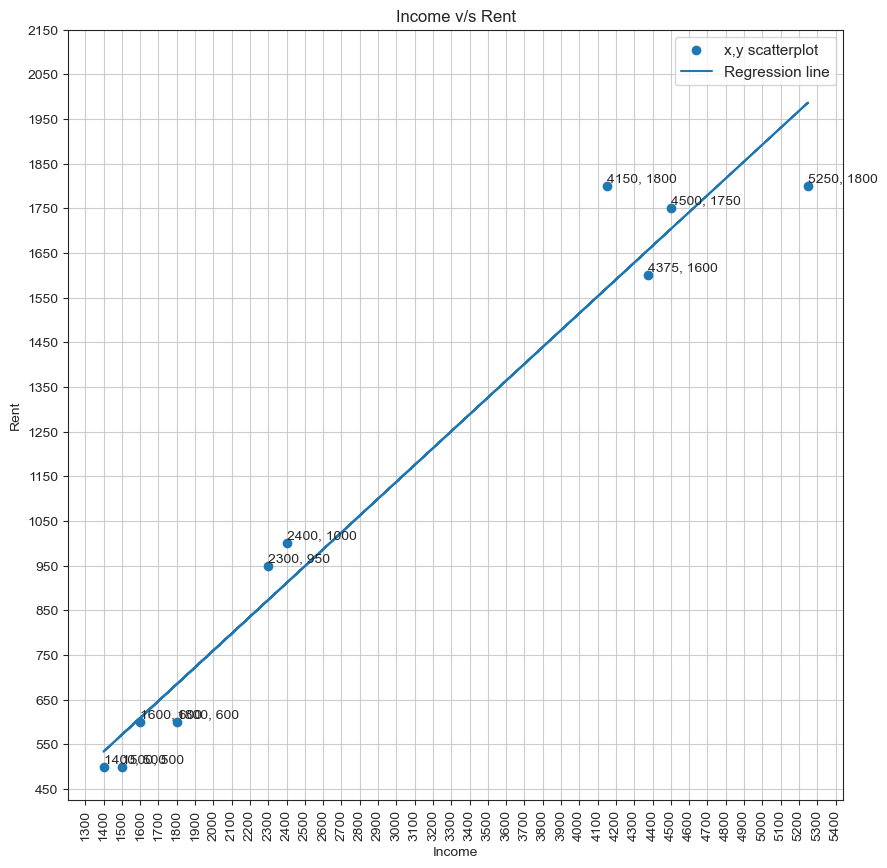

In [24]:
x = data['Income']
y = data['Rent']
p = data['Predictions']

plt.figure(figsize=(10,10))

plt.scatter(x,y,label='x,y scatterplot')
for i in range(len(x)):
    text =''
    text = str(x[i])+', '+str(y[i])
    plt.annotate(text, (x[i],y[i]+10))
    
plt.plot(x,p,label='Regression line')
plt.xlabel('Income')
plt.ylabel('Rent')
plt.title('Income v/s Rent')
plt.legend(fontsize=11)
plt.xticks(np.arange(1300,5500,100),rotation=90)
plt.yticks(np.arange(450,2200,100))
plt.grid()
plt.show()

In [27]:
#How well the model can predict future data

from sklearn.metrics import r2_score

print("R2; ",r2_score(data[['Rent']],data[['Predictions']]))

R2;  0.9587991788081074


In [28]:
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(data[['Rent']],data[['Predictions']]))

MSE:  11964.718474125602


In [29]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(data[['Rent']],data[['Predictions']])))

RMSE:  109.38335556256081


In [31]:
model.predict([[1500]])

array([[571.04428709]])